In [1]:
!pip install opencv-python opencv-contrib-python

###  이미지 로딩

In [2]:
# openCV 라이브러리 가져오기
import cv2

In [10]:
img = cv2.imread('images/momo.jpg', cv2.IMREAD_COLOR)

In [11]:
cv2.imshow('momo', img)
cv2.waitKey(0)
cv2.destroyAllWindows() # 키보드 입력이 올 때까지 대기

In [ ]:
img = cv2.imread('images/momo.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('momo', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

#####  imread(파일명, 이미지 형식) - 이미지를 읽어오기 위한 객체 리턴
- imshow(제목, 이미지 객체)
- waitKey(0) : 키보드 입력을 기다리는 시간 ( 0: 계속 기다림 )
- destroyAllWindows() : 생성한 윈도우 창 닫기

#####  matplotlib 이용한 컬러이미지 로딩
- 파이썬 색상공간 BGR 사용, 원본이미지는 RGB. → 변환 필요!

In [12]:
import matplotlib.pyplot as plt

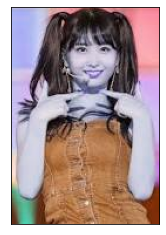

In [14]:
img = cv2.imread('images/momo.jpg', cv2.IMREAD_COLOR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

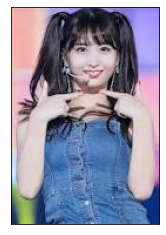

In [15]:
img = cv2.imread('images/momo.jpg', cv2.IMREAD_COLOR)

# 색상공간을 변환 (RGB → BGR)
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.xticks([])
plt.yticks([])
plt.imshow(img)
plt.show()

### 색상 공간 변환
- gray 이미지 : 0-255로 픽셀 값으로 구성된 흑백이미지
- 이진 이미지 : 0(검정), 255(흰색)로만 구성된 이미지

In [ ]:
# 컬러 -> 흑백 변환 2가지
# 1. imread()로 이미지를 읽을 때 변환
# 2. 컬러 이미지로 읽어서 cvtColor로 변환

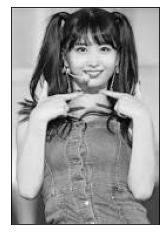

In [17]:
img = cv2.imread('images/momo.jpg', cv2.IMREAD_COLOR)

# 흑백이미지 변환
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.xticks([])
plt.yticks([])
plt.imshow(img, cmap='gray')
plt.show()

### 이진(Binary) 이미지 만들기

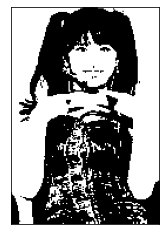

In [21]:
img = cv2.imread('images/momo.jpg', cv2.IMREAD_GRAYSCALE)

# 이진이미지 변환
ret, thr1 = (cv2.threshold(img, 127, 255, cv2.THRESH_BINARY))

plt.xticks([])
plt.yticks([])
plt.imshow(thr1, cmap='gray')
plt.show()

- cv2.threshold(img, threshold_value,value, flag)
    - img : gray이미지
    - threshold_value : 임계값(0, 1로 나누기 위한 값)
    - value : 임계값보다 클 때 적용되는 값
    - flag : 적용 방법

###  비디오 프레임 출력하기

In [22]:
cap =  cv2.VideoCapture('images/video.mp4')

while True:
    ret, frame = cap.read()
    # ret - T/F (read의 성공여부)
    
    if not ret: # 이미지 불러오지 못하면 T ! -> 조건문 실행!
        print('비디오 읽기 오류')
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.waitKey(1) # 1이면 한 사진을 0.001ms로 보여주기
    cv2.imshow('video', frame)

비디오 읽기 오류


In [24]:
cap =  cv2.VideoCapture('images/video.mp4') # 동영상
# cap = cv2.VideoCapture(0)                    # 웹카메라 사용시 0

while True:
    ret, frame = cap.read()
    # ret - T/F (read의 성공여부)
    
    if not ret: # 이미지 불러오지 못하면 T ! -> 조건문 실행!
        print('비디오 읽기 오류')
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow('video', frame)
    
    k = cv2.waitKey(30) # 1이면 한 사진을 0.001ms로 보여주기
    
    if k == 49:  # 키보드 1 누르면 비디오 닫기
        cap.release()
        cv2.destroyAllWindows()
        break

### 비디오 녹화하기

In [30]:
cap =  cv2.VideoCapture('images/video.mp4') # 동영상
# cap = cv2.VideoCapture(0)

fps = 30.0    # frame per second
width = int(cap.get(3))    # 비디오 가로
height = int(cap.get(3))   # 비디오 세로

fcc = cv2.VideoWriter_fourcc(*'MPEG') # 코덱

out = cv2.VideoWriter('video01.mp4', fcc, fps, (width, height))
# 저장시킬 이름, 코덱 정보, 프레임, 영상 크기

record = False

while True:
    ret, frame = cap.read()
    # ret - T/F (read의 성공여부)
    
    if not ret: # 이미지 불러오지 못하면 T ! -> 조건문 실행!
        print('비디오 읽기 오류')
        cap.release()
        cv2.destroyAllWindows()
        break
        
    cv2.imshow('video', frame)
    
    if record:
        out.write(frame)
    
    k = cv2.waitKey(30) # 1이면 한 사진을 0.001ms로 보여주기
    
    if k == 49:  # 키보드 1 누르면 비디오 닫기
        cap.release()
        cv2.destroyAllWindows()
        break
    
    if k == 50: # 키보드 2 누르면 녹화가 시작되는 기능
        print('녹화 시작!')
        record = True
        
    if k == 51: # 키보드 3 누르면 녹화 종료
        print('녹화 종료')
        record = False
        out.release()

###  비디오의 한 프레임 이미지 파일로 저장(캡처)

In [32]:
cap =  cv2.VideoCapture('images/video.mp4')

cnt = 0

while True:
    ret, frame = cap.read()
    
    k = cv2.waitKey(30)
    
    if k == 50: # 키보드 2를 누르면 캡처
        cnt+=1
        print('test{}.png'.format(cnt))
        cv2.imwrite('test{}.png'.format(cnt), frame)
        
    cv2.imshow('video', frame)
    
    if k == 49:
        cap.release()
        cv2.destroyAllWindows()
        break

### 이미지 처리 방법

(1) 픽셀기반 처리 : 픽셀 단위로 처리<br>
(2) 블록기반 처리 : 블록(픽셀 그룹화)  단위로 처리 (필터)<br>
(3) 주파수 기반 처리 : 주파수 영역으로 변환하여 처리 -FFT, DCT, WT 등

###  이미지 픽셀 값 출력

In [36]:
img = cv2.imread('images/momo.jpg')
img[20, 10] # img는 넘파이 기반

array([170, 175, 244], dtype=uint8)

- img[20, 10] : 픽셀의 좌표
- 170(Blue), 175(Green), 244(red) 순으로 출력

In [37]:
img = cv2.imread('images/momo.jpg')

cv2.imshow('momo', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 픽셀 값 변경

In [39]:
img = cv2.imread('images/momo.jpg')

img[20, 10] = [255,255,255]
img[21, 11] = [255,255,255]
img[22, 12] = [255,255,255]
img[23, 13] = [255,255,255]

cv2.imshow('momo', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [38]:
img.shape

(186, 127, 3)

In [40]:
img.size

70866

###  ROI(Region of Image) 설정

In [44]:
img = cv2.imread('images/momo.jpg')

cv2.imshow('momo', img)

subimg = img[10:100, 50:100]
cv2.imshow('cutting', subimg)


cv2.waitKey(0)
cv2.destroyAllWindows()

### RGB 채널 분리

In [47]:
img = cv2.imread('images/momo.jpg')

b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

cv2.imshow('blue channel', b)
cv2.imshow('blue channel', g)
cv2.imshow('blue channel', r)

cv2.waitKey(0)
cv2.destroyAllWindows()

### OCR(Optical character recognition)
- 광학 문자 인식

In [48]:
!pip install pytesseract

In [49]:
import pytesseract

In [50]:
# r : 뒤에 오는 문자열을 그대로 기억
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

In [51]:
import cv2
import matplotlib.pyplot as plt

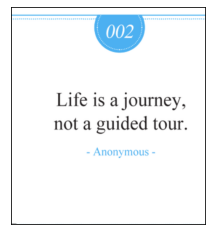

In [60]:
# 이미지 불러오기
img = cv2.imread('images/text.png') # 이미지 읽어오기! numpy의 array
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # 색상체계 바꿔주기 -> cv, plt가 다르니까

plt.xticks([])
plt.yticks([])
plt.imshow(img) # 읽어온걸 보여주기!
plt.show()

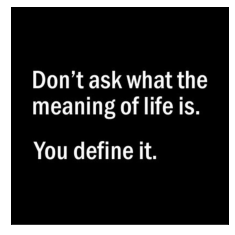

In [61]:
# 이미지 불러오기
img2 = cv2.imread('images/text.jfif') # 이미지 읽어오기! numpy의 array
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2BGR) # 색상체계 바꿔주기 -> cv, plt가 다르니까

plt.xticks([])
plt.yticks([])
plt.imshow(img2) # 읽어온걸 보여주기!
plt.show()

In [62]:
text = pytesseract.image_to_string(img, lang='eng')
print(text)

Life is a journey,
not a guided tour.

- Anonymous -



In [63]:
text2 = pytesseract.image_to_string(img2, lang='eng')
print(text2)

Don’t ask what the
meaning of life is.

You define it.



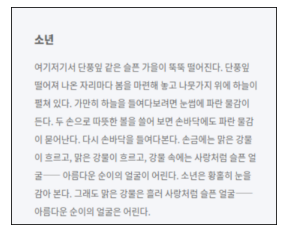

In [66]:
# 한글 이미지 불러오기
img3 = cv2.imread('images/story.png') # 이미지 읽어오기! numpy의 array
img3 = cv2.cvtColor(img3, cv2.COLOR_RGB2BGR) # 색상체계 바꿔주기 -> cv, plt가 다르니까

plt.xticks([])
plt.yticks([])
plt.imshow(img3) # 읽어온걸 보여주기!
plt.show()

In [67]:
text3 = pytesseract.image_to_string(img3, lang='kor')
print(text3)

소년

여기저기서 단풍잎 같은 슬픈 가을이 뚝뚝 떨어진다. 단풍잎
떨어져 나온 자리마다 봄을 마련해 놓고 나못가지 위에 하늘이
펼쳐 있다. 가만히 하늘을 들여다보려면 눈썸에 파란 물감이
든다. 두 손으로 따뜻한 볼을 쓸어 보면 손바닥에도 파란 물감
이 묻어난다. 다시 손바닥을 들여다본다. 손금에는 맑은 강물
이 흐르고, 맑은 강물이 흐르고, 강물 속에는 사랑처럼 슬픈 얼
굴ㅡ- 아름다운 순이의 얼굴이 어린다. 소년은 황홀히 눈을
감아 본다. 그래도 맑은 강물은 흘러 사랑처럼 슬픈 얼굴--
아름다운 순이의 얼굴은 어린다.



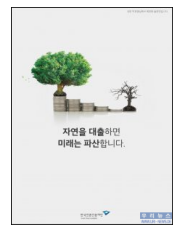

In [68]:
# 한글 이미지 불러오기
img4 = cv2.imread('images/nature.png') # 이미지 읽어오기! numpy의 array
img4 = cv2.cvtColor(img4, cv2.COLOR_RGB2BGR) # 색상체계 바꿔주기 -> cv, plt가 다르니까

plt.xticks([])
plt.yticks([])
plt.imshow(img4) # 읽어온걸 보여주기!
plt.show()

In [69]:
text4 = pytesseract.image_to_string(img4, lang='kor')
print(text4)

자연을 대출하면
미래는 파산합니다




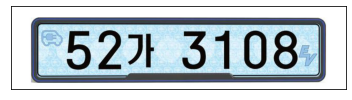

In [70]:
# 자동차 번호판
img5 = cv2.imread('images/car.png') # 이미지 읽어오기! numpy의 array
img5 = cv2.cvtColor(img5, cv2.COLOR_RGB2BGR) # 색상체계 바꿔주기 -> cv, plt가 다르니까

plt.xticks([])
plt.yticks([])
plt.imshow(img5) # 읽어온걸 보여주기!
plt.show()

In [71]:
text5 = pytesseract.image_to_string(img5, lang='kor')
print(text5)

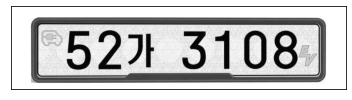

In [74]:
# 흑백 이미제엇 글자 추출해보기!
img5 = cv2.imread('images/car.png')
img5 = cv2.cvtColor(img5, cv2.COLOR_RGB2BGR)

# 흑백변환
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)

plt.xticks([])
plt.yticks([])
plt.imshow(img5, cmap='gray')
plt.show()

In [75]:
text5 = pytesseract.image_to_string(img5, lang='kor')
print(text5)

527 3108.



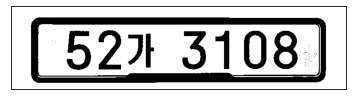

In [76]:
img5 = cv2.imread('images/car.png')
img5 = cv2.cvtColor(img5, cv2.COLOR_RGB2BGR)

# 흑백이미지 변환
img5 = cv2.cvtColor(img5, cv2.COLOR_BGR2GRAY)
# 이진이미지 변환 (흑,백으로 이미지 표현)
ret, img5 = cv2.threshold(img5, 150, 255, 0)

plt.xticks([])
plt.yticks([])
plt.imshow(img5, cmap='gray')
plt.show()

In [77]:
text5 = pytesseract.image_to_string(img5, lang='kor')
print(text5)

| 52가 3108

